In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [26]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      lines = training_file.readlines()
      images = []
      labels = []
      for i in range(1, len(lines)):
        line = lines[i]
        line = line.split(',')
        label = line[0]
        image = line[1:]
        images.append(image)
        labels.append(label)
      images = np.array(images,dtype=float).reshape(-1, 28,28)
      labels = np.array(labels, dtype=int)
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [30]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = training_images.reshape(-1, 28, 28, 1)
testing_images = testing_images.reshape(-1, 28, 28, 1)

from tensorflow.keras.utils import to_categorical
training_labels = to_categorical(training_labels)
testing_labels = to_categorical(testing_labels)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1/255.0)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [34]:
print(training_labels.shape)

# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(25, activation='softmax')
])

# Compile Model. 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_generator = train_datagen.flow(
    training_images,
    training_labels,
    #class_mode='categorical',
    #target_size=(28,28),
    batch_size=10
)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    #class_mode='categorical',
    #target_size=(28,28),
    batch_size=10
)


# Train the Model
history = model.fit_generator(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    validation_steps=50,
    verbose=1,
    epochs=10
)

model.evaluate(testing_images, testing_labels, verbose=0)

(27455, 25)
Epoch 1/20
100/100 [==============================] - 7s 70ms/step - loss: 3.2087 - accuracy: 0.0330 - val_loss: 3.2090 - val_accuracy: 0.0280
Epoch 2/20
100/100 [==============================] - 7s 65ms/step - loss: 3.1775 - accuracy: 0.0570 - val_loss: 3.1609 - val_accuracy: 0.0360
Epoch 3/20
100/100 [==============================] - 6s 64ms/step - loss: 3.1059 - accuracy: 0.0820 - val_loss: 3.0303 - val_accuracy: 0.1240
Epoch 4/20
100/100 [==============================] - 7s 67ms/step - loss: 2.9921 - accuracy: 0.0960 - val_loss: 2.8999 - val_accuracy: 0.1120
Epoch 5/20
100/100 [==============================] - 7s 65ms/step - loss: 2.9114 - accuracy: 0.1360 - val_loss: 2.7649 - val_accuracy: 0.1740
Epoch 6/20
100/100 [==============================] - 6s 64ms/step - loss: 2.8641 - accuracy: 0.1370 - val_loss: 2.6537 - val_accuracy: 0.1840
Epoch 7/20
100/100 [==============================] - 6s 65ms/step - loss: 2.7358 - accuracy: 0.1650 - val_loss: 2.6891 - val_accu

[210.96734197034692, 0.3060513]

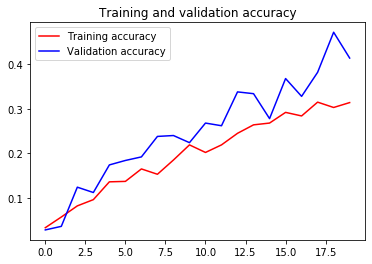

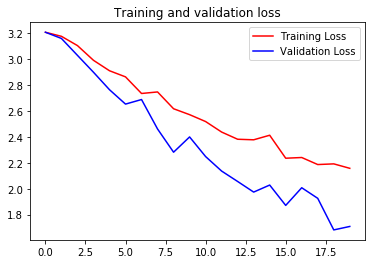

In [35]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);